# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load the dataset

In [2]:
df = pd.read_csv("Iris.csv")

df.drop(['Id'], inplace=True, axis=1)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Features split and Train Test Split

In [3]:
x = df.drop(["Species"], axis=1)
y = df["Species"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

# Model Training and Prediction

In [4]:
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 3, 5]
}

dt = DecisionTreeClassifier(random_state=10)
grid_search = GridSearchCV(dt, grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(x_test)

# Evaluation

Training Accuracy: 0.975
Test Accuracy: 0.9333333333333333


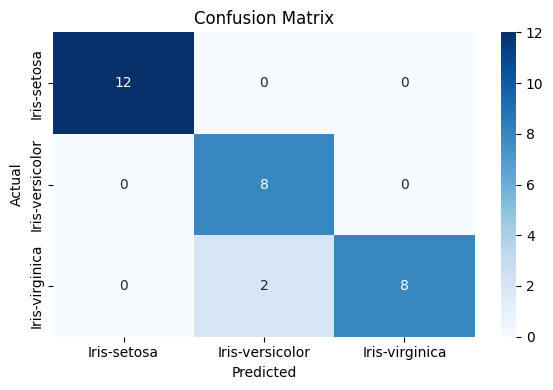


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.95      0.93      0.93        30

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean CV accuracy: 0.96


In [5]:
print("Training Accuracy:", accuracy_score(y_train, best_dt.predict(x_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

scores = cross_val_score(best_dt, x, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

# Tree Visualization

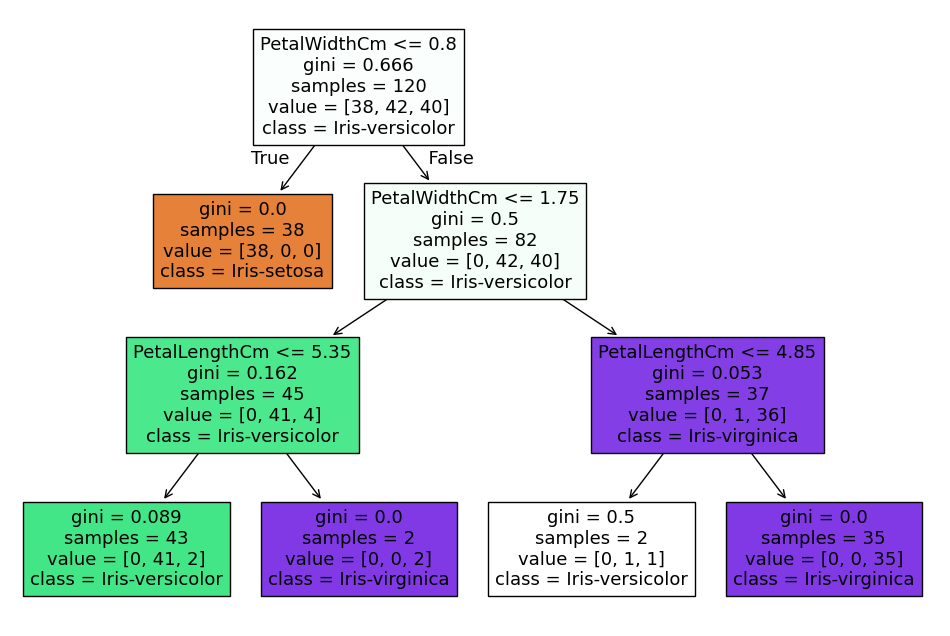

In [6]:
# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt, filled=True, feature_names=x_train.columns, class_names=y_train.unique())
plt.savefig("decision_tree.png")
plt.show()